# Usage

This notebook provides the steps to build a network starting from a list of genes, and using the default functionalities of Omniflow.

In [1]:
%%time
from omniflow_project.core.network import Network
from omniflow_project._visual.visualize_network import NetworkVisualizer
from omniflow_project._inputs.resources import Resources
from omniflow_project._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 1.67 s, sys: 371 ms, total: 2.04 s
Wall time: 2.11 s


## 1. Define the list of genes of interest

In [13]:
genes = ["SRC", "NOTCH1", "FAK"]

## 2. Create a network using as input the gene set. 

<div class="alert alert-info">

**Note**
    
NB! If no resource is specified, the default used resource by the package is `omnipath.all_interactions()`. To add new resources, please see the [Add resources](https://omniflow-project.readthedocs.io/en/latest/notebooks/add_resources.html#) tutorial. 

</div>  


### 2A. Import genes as network nodes

In [14]:
new_net1 = Network(genes)

In [15]:
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN


### 2B. Explore if the nodes are connected without introducing new intermidiate nodes

In [5]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 103 ms, sys: 399 µs, total: 103 ms
Wall time: 102 ms


### 2C. Visualize the network with the following command. 

The network picture is also exported in the working repository, in pdf format.

In [6]:
%%time
new_net1.complete_connection(maxlen=3, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

CPU times: user 14.9 s, sys: 20 ms, total: 14.9 s
Wall time: 14.9 s


In [7]:
new_net2 = Network(genes)
new_net2.connect_nodes(only_signed=True, consensus_only=True)
new_net2.complete_connection(maxlen=5, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

In [8]:
import pandas as pd

def compare_networks(net1, net2):
    # Reset index for both DataFrames
    net1_edges_reset = net1.edges.reset_index(drop=True)
    net2_edges_reset = net2.edges.reset_index(drop=True)
    
    # Find rows in net1.edges not in net2.edges
    unique_net1 = net1_edges_reset.merge(net2_edges_reset, how='left', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop(columns='_merge')
    
    # Find rows in net2.edges not in net1.edges
    unique_net2 = net2_edges_reset.merge(net1_edges_reset, how='left', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop(columns='_merge')

    net1_flt = net1.copy()
    net2_flt = net2.copy()
    # Filter original DataFrames
    net1_flt.edges = net1_flt.edges[~net1_flt.edges.isin(unique_net1)].dropna()
    net2_flt.edges = net2_flt.edges[~net2_flt.edges.isin(unique_net2)].dropna()
    
    return net1_flt, net2_flt


In [8]:
import pandas as pd

def compare_networks(net1, net2):
    unique_net1 = net1.edges.merge(net2.edges, how='left', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop(columns='_merge')
    unique_net2 = net2.edges.merge(net2.edges, how='left', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop(columns='_merge')
    print(len(unique_net1))  
    print(len(unique_net2))  

    net1.edges = net1.edges[~net1.edges.isin(unique_net1)].dropna()
    net2.edges = net2.edges[~net2.edges.isin(unique_net2)].dropna()
    
    return  net1.edges,net2.edges

In [9]:
compare_networks(new_net1,new_net2)

(<omniflow_project.core.network.Network at 0x7f38fd559030>,
 <omniflow_project.core.network.Network at 0x7f39610a0730>)

In [12]:
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,DAB1,O75553,NaN
4,CTNNB1,P35222,NaN
5,ITGB4,P16144,NaN
6,PTPRH,Q9HD43,NaN
7,ITGB7,P26010,NaN
8,CSK,P41240,NaN
9,BCAR1,P56945,NaN


## 3. Visualize final network

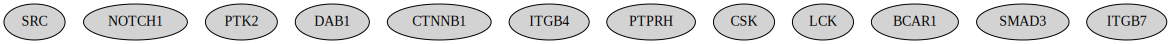

In [11]:
#Visualize a specific nodes and 
visualizer1 = NetworkVisualizer(new_net1,color_by='effect')
visualizer1.render(output_file='network2')

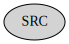

In [12]:
#Visualize a specific nodes and 
visualizer1 = NetworkVisualizer(new_net1, predefined_node = "SRC",color_by='effect')
visualizer1.render(output_file='network2')

In [13]:
#We can access to the edges of the network
new_net1.edges

,source,target,Type,Effect,References
